,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


--------------------------------------------------


array([[-2.84072137,  0.49270741],
       [-2.86913259,  0.29165991],
       [-3.03124586,  0.32641847]])

--------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.840721,0.492707
1,4.9,3.0,1.4,0.2,0,1,-2.869133,0.291660
2,4.7,3.2,1.3,0.2,0,1,-3.031246,0.326418
3,4.6,3.1,1.5,0.2,0,1,-2.897623,0.246555
4,5.0,3.6,1.4,0.2,0,1,-2.881928,0.503342


Int64Index([50, 51, 53, 54, 55], dtype='int64')

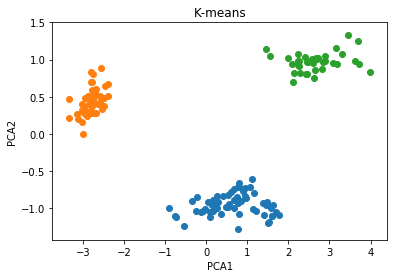

In [54]:
#### K-mean 클러스터
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#pd.options.display.max
def load_data():
    
    iris = load_iris()
    #print(dir(iris))
    #print(iris.feature_names)
    irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    #print(irisDF)
    #display(irisDF.head())
    irisDF['target'] = iris.target
    #display(irisDF.head())
    #display(irisDF.tail())
    #display(irisDF['target'].unique())
    
    return irisDF

def k_means_clus(irisDF):
    kmeans = KMeans(init='random', n_clusters=3, random_state=100)
    kmeans.fit(irisDF.drop('target', axis=1))
    irisDF['cluster'] = kmeans.labels_
    #display(irisDF)
    #display(irisDF['cluster'].nunique())
    #display(irisDF['cluster'].value_counts())
    #iris_result = irisDF.groupby(['target', 'cluster'])
    iris_result = irisDF.groupby(['target', 'cluster'])['sepal length (cm)'].count()
    
    #display(iris_result.describe())
    #display(dir(iris_result['sepal length (cm)'].count()))
    #print(iris_result.loc[2][2])
    #print(iris_result[1][2])
    #display(iris_result)
    return iris_result, irisDF

def Visualize(irisDF):
    display(irisDF.head())
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)
    
    #print('-'*50)
    #display(pca_transformed)
    print('-'*50)
    display(pca_transformed[0:3,:])
    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]
    
    print('-'*50)
    display(irisDF.head())
    
    idx_0 = irisDF[irisDF['cluster']==0].index
    idx_1 = irisDF[irisDF['cluster']==1].index
    idx_2 = irisDF[irisDF['cluster']==2].index
    
    display(idx_0[0:5])
    
    fig, ax = plt.subplots()
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y = irisDF.loc[idx_0, 'pca_y'], marker='o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y = irisDF.loc[idx_1, 'pca_y'], marker='o')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y = irisDF.loc[idx_2, 'pca_y'], marker='o')
    ax.set_title('K-means')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

def main():
    #print('main')
    irisDF = load_data()
    iris_result, irisDF = k_means_clus(irisDF)
    Visualize(irisDF)

if __name__ == '__main__':
    main()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


--------------------------------------------------


array([[-2.84072137,  0.49270741],
       [-2.86913259,  0.29165991],
       [-3.03124586,  0.32641847]])

--------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.840721,0.492707
1,4.9,3.0,1.4,0.2,0,1,-2.869133,0.291660
2,4.7,3.2,1.3,0.2,0,1,-3.031246,0.326418
3,4.6,3.1,1.5,0.2,0,1,-2.897623,0.246555
4,5.0,3.6,1.4,0.2,0,1,-2.881928,0.503342


Int64Index([50, 51, 53, 54, 55], dtype='int64')

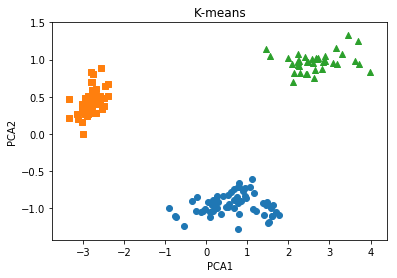

In [56]:
### GMM
#### K-mean 클러스터
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pd.options.display.max_rows=160
pd.options.display.max_columns=50


def load_data():
    
    iris = load_iris()
    irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    irisDF['target'] = iris.target
    return irisDF

def gmm_clus(irisDF):
    #kmeans = KMeans(init="random",n_clusters=3, random_state = 100)
    gmm = GaussianMixture(n_components=3, random_state = 100)
    gmm.fit(irisDF.drop('target',axis=1))
    irisDF['cluster'] = gmm.predict(irisDF.drop('target',axis=1))
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()

    return iris_result, irisDF

def Visualize(irisDF):
    #display(irisDF.head())
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)
    
    #print('-'*50)
    #display(pca_transformed[0:3,:])
    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]
    
    #print('-'*50)
    #display(irisDF.head())
    
    idx_0 = irisDF[irisDF['cluster']==0].index
    idx_1 = irisDF[irisDF['cluster']==1].index
    idx_2 = irisDF[irisDF['cluster']==2].index
    #display(idx_0[0:5])
    fig,ax = plt.subplots()
    ax.scatter(x=irisDF.loc[idx_0,'pca_x'], y = irisDF.loc[idx_0,'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1,'pca_x'], y = irisDF.loc[idx_1,'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2,'pca_x'], y = irisDF.loc[idx_2,'pca_y'], marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    
def main():
    irisDF = load_data()
    iris_result, irisDF = gmm_clus(irisDF)
    Visualize(irisDF)

if __name__ == '__main__':
    main()

array([0, 1, 2])

K-means Clustering
target  kmeans_label
0       0               67
        1               31
        2                2
1       2               97
        0                3
2       1               67
        0               33
Name: kmeans_label, dtype: int64
Gaussian Mixture Model
target  gmm_label
0       2            100
1       1             98
        2              2
2       0             92
        2              8
Name: gmm_label, dtype: int64


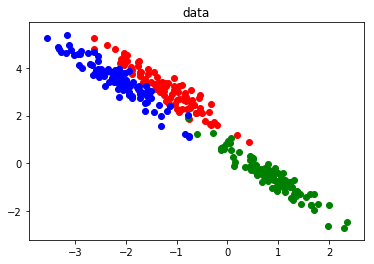

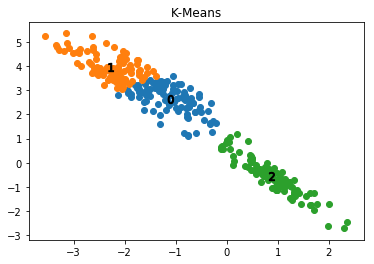

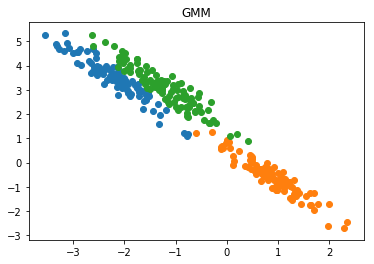

In [30]:
# K-Mean vs GMM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 임의의 데이터를 타원형태로 만들 계획임

# make_blobs()으로 데이터를
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.8, random_state=0)

#display(X.shape)
#display(X)
#display(y)
#fig, ax = plt.subplots()
#ax.scatter(X[:,0],X[:,1])

# 데이터의 분포를 변형시키기 위해 transformation을 하자
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] # 내적?

X_aniso = np.dot(X, transformation)
#fig, ax = plt.subplots()
#ax.scatter(X_aniso[:,0], X_aniso[:,1])

# 데이터 프레임 만들기
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
#display(clusterDF)
clusterDF['target'] = y
#display(clusterDF)
target_list = np.unique(y)
display(target_list)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    colors = ['r', 'g', 'b']
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], color=colors[target])

def K_means():
    k_means = KMeans(init='random', n_clusters=3, random_state=0)
    
    kmeans_label = k_means.fit(X_aniso).labels_
    clusterDF['kmeans_label'] = kmeans_label
    #display(clusterDF)
    
    # Kmeans 군집의 중심값을 뽑아 저장하자.
    center = k_means.cluster_centers_
    
    # KMeans 군집 결과를 시각화
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'])
        ax.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)
        
    print('K-means Clustering')
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())
    return kmeans_label

def GMM():
    gmm = GaussianMixture(n_components=3, random_state=0)
    
    gmm_label = gmm.fit_predict(X_aniso)
    clusterDF['gmm_label'] = gmm_label
    
    #display(clusterDF)
    unique_labels = np.unique(gmm_label)
    fig, ax = plt.subplots()
    plt.title('GMM')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'])
        
    print('Gaussian Mixture Model')
    print(clusterDF.groupby('target')['gmm_label'].value_counts())
    return gmm_label

def main():
    #print('main')
    data_visualize()
    K_means()
    GMM()
    

if __name__ == '__main__':
    main()

Text(0.5, 1.0, '70 degree X shearing')

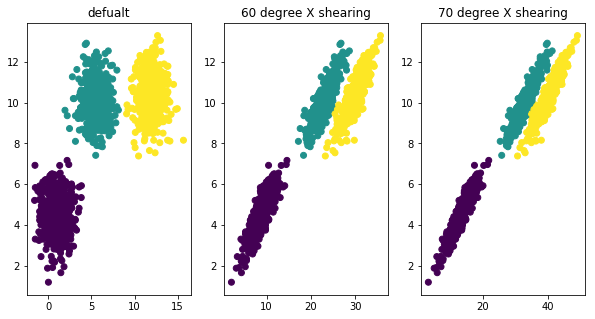

In [28]:
# transformation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5))

n_samples = 1500
random_state=170
X,y = make_blobs(n_samples = n_samples, random_state = random_state, center_box=(0,20))

ax1.scatter(X[:,0],X[:,1], c=y)
ax1.set_title('defualt')

theta = np.radians(60)
t = np.tan(theta)
shear_x = np.array( ( (1,t),(0,1) ) ).T

X_rotated = X.dot(shear_x)
ax2.scatter(X_rotated[:,0], X_rotated[:,1], c=y)
ax2.set_title('%1.f degree X shearing' % np.degrees(theta))

theta = np.radians(70)
t = np.tan(theta)
shear_x = np.array( ( (1,t),(0,1) ) ).T

X_rotated = X.dot(shear_x)
ax3.scatter(X_rotated[:,0], X_rotated[:,1], c=y)
ax3.set_title('%1.f degree X shearing' % np.degrees(theta))

In [37]:
### PCA
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

def load_data():
    X, y = load_wine(return_X_y=True)
    column_start = 6
    X = X[:, column_start : column_start + 2]
    print(X.shape)
    
    return X

def pca_data(X):
    
    pca = PCA(n_components=1)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    return pca, X_pca

def visualize(pca, X, X_pca):
    X_new = pca.inverse_transform(X_pca)
    
    plt.scatter(X[:,0], X[:,1], alpha=0.2)
    plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)


def main():
    #print('main')
    X = load_data()
    pca, X_pca = pca_data(X)
    print(' - original shape :', X.shape)
    print(' - transformed shape :', X_pca.shape)
    

if __name__ == '__main__':
    main()

(178, 2)
 - original shape : (178, 2)
 - transformed shape : (178, 1)


In [46]:
### t-SNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

def load_data():
    
    X,y = load_wine(return_X_y=True)
    column_start = 5
    X = X[:, column_start:column_start+2]
    return X

def tsne_data():
    
    tsne = TSNE(n_components=1)
    X_tsne = tsne.fit_transform(X)
    
    return tsne, X_tsne

def main():
    #print('main')
    X = load_data()
    
    tsne, X_tsne = tsne_data(X)
    print('- original shape :', X.shape)
    print('- transformed shape :', X_tsne.shape)
    print('\n원본 데이터 X :', X[:5])
    print('\차원 축소 이후 데이터 X :', X_tsne[:5])
    
    
if __name__ == '__main__':
    main()

TypeError: tsne_data() takes 0 positional arguments but 1 was given